## Draw rectangle on image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

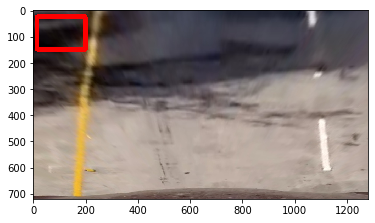

In [11]:
image_name = "intermediate_images/test5-warped.jpg"
img = cv2.imread(image_name)
margin = 100
window = 0
window_height = 40
leftx_current = 513
rightx_current = 2056
bottom_left_pt_y = int(window * window_height)
bottom_left_pt_x = int(leftx_current - (margin / 2))
top_right_y = int((window * window_height) + window_height)
top_right_x = int(rightx_current + (margin / 2))
bottom_left = (bottom_left_pt_x, bottom_left_pt_y)
top_right = (top_right_x, top_right_y)
cv2.rectangle(img, bottom_left, top_right, (0,0,255), 5)
#cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


## Nonzero experimentation

In [51]:
x = np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1]])
print(x)
print(x.nonzero())
#help(np.nonzero)
#x_zipped= zip(x.nonzero()[0], x.nonzero()[1])
#help(zip)
#type(x.nonzero()[0])
print("nonzero transponse: {}".format(np.transpose(np.nonzero(x))))
nonzero_filtered = [nonzero_pt for nonzero_pt in np.transpose(np.nonzero(x)) if (nonzero_pt[0] == 2 and nonzero_pt[1] >= 0) ]
print("nonzero_filtered: {}".format(nonzero_filtered))




[[0 0 0]
 [0 0 0]
 [1 1 1]]
(array([2, 2, 2]), array([0, 1, 2]))
nonzero transponse: [[2 0]
 [2 1]
 [2 2]]
nonzero_filtered: [array([2, 0]), array([2, 1]), array([2, 2])]


In [34]:
result = zip([1], [2])

In [41]:
for val in x_zipped:
    print(val)

(2, 0)
(2, 1)
(2, 2)


In [42]:
help(np.nonzero)

Help on function nonzero in module numpy:

nonzero(a)
    Return the indices of the elements that are non-zero.
    
    Returns a tuple of arrays, one for each dimension of `a`,
    containing the indices of the non-zero elements in that
    dimension. The values in `a` are always tested and returned in
    row-major, C-style order. The corresponding non-zero
    values can be obtained with::
    
        a[nonzero(a)]
    
    To group the indices by element, rather than dimension, use::
    
        transpose(nonzero(a))
    
    The result of this is always a 2-D array, with a row for
    each non-zero element.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    tuple_of_arrays : tuple
        Indices of elements that are non-zero.
    
    See Also
    --------
    flatnonzero :
        Return indices that are non-zero in the flattened version of the input
        array.
    ndarray.nonzero :
        Equivalent ndarray method

In [62]:
# Helper function
def get_activated_window(pt1, pt2, nonzero_pts):
    
    #print("get_activated_window called with pt1: {} pt2: {}".format(pt1, pt2))
    #print("pt1[0]: {} pt2[0]: {} max: {}".format(type(pt1[0]), type(pt2[0]), type(max)))
    
    # find min x coord
    min_x = min(pt1[0], pt2[0])
    
    # find max x coord
    max_x = max(pt1[0], pt2[0])
    
    # find min y coord
    min_y = min(pt1[1], pt2[1])
    
    # find max y coord
    max_y = max(pt1[1], pt2[1])

    # return filtered nonzero tuple where points fall within window
    nonzero_filtered = [nonzero_pt for nonzero_pt in np.transpose(nonzero_pts) 
                        if (nonzero_pt[0] >= min_y and 
                            nonzero_pt[0] <= max_y and
                            nonzero_pt[1] >= min_x and
                            nonzero_pt[1] <= max_x) ]
    
    print("min_x: {} max_x: {} min_y: {} max_y: {}".format(min_x, max_x, min_y, max_y))
    
    for nonzero_pt in np.transpose(np.nonzero(nonzero_pts)):
        if (nonzero_pt[0] >= min_y and 
                            nonzero_pt[0] <= max_y and
                            nonzero_pt[1] >= min_x and
                            nonzero_pt[1] <= max_x):
            print("nonzero_pt {} matches filter".format(nonzero_pt))
                                   
    
    return nonzero_filtered

In [53]:
x

array([[0, 0, 0],
       [0, 0, 0],
       [1, 1, 1]])

In [63]:
get_activated_window((0,0), (0,1), x.nonzero())

min_x: 0 max_x: 0 min_y: 0 max_y: 1
nonzero_pt [0 0] matches filter


[]

In [64]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [66]:
a = np.array([[1, 2], [3, 4]])
np.concatenate(a)

array([1, 2, 3, 4])

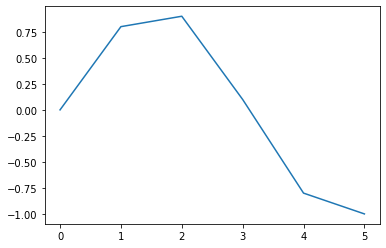

In [69]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
plt.plot(x, y)

/Users/traun.leyden/Development/CarND-Advanced-Lane-Lines/.direnv/python-3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


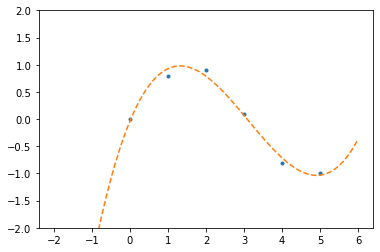

In [76]:
p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(x, y, 30))
xp = np.linspace(-2, 6, 100)
plt.ylim(-2,2)
#_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
_ = plt.plot(x, y, '.', xp, p(xp), '--')

In [77]:
help(np.dstack)

Help on function dstack in module numpy:

dstack(tup)
    Stack arrays in sequence depth wise (along third axis).
    
    This is equivalent to concatenation along the third axis after 2-D arrays
    of shape `(M,N)` have been reshaped to `(M,N,1)` and 1-D arrays of shape
    `(N,)` have been reshaped to `(1,N,1)`. Rebuilds arrays divided by
    `dsplit`.
    
    This function makes most sense for arrays with up to 3 dimensions. For
    instance, for pixel-data with a height (first axis), width (second axis),
    and r/g/b channels (third axis). The functions `concatenate`, `stack` and
    `block` provide more general stacking and concatenation operations.
    
    Parameters
    ----------
    tup : sequence of arrays
        The arrays must have the same shape along all but the third axis.
        1-D or 2-D arrays must have the same shape.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays, will be at least 3-D.
    
    See Al

In [81]:
help(cv2.warpPerspective)

Help on built-in function warpPerspective:

warpPerspective(...)
    warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
    .   @brief Applies a perspective transformation to an image.
    .   
    .   The function warpPerspective transforms the source image using the specified matrix:
    .   
    .   \f[\texttt{dst} (x,y) =  \texttt{src} \left ( \frac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}} ,
    .   \frac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}} \right )\f]
    .   
    .   when the flag #WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted with invert
    .   and then put in the formula above instead of M. The function cannot operate in-place.
    .   
    .   @param src input image.
    .   @param dst output image that has the size dsize and the same type as src .
    .   @param M \f$3\times 3\f$ transformation matrix.
    .   @param dsize size of the output image.
    .   @param flags combi

In [82]:
help(cv2.addWeighted)

Help on built-in function addWeighted:

addWeighted(...)
    addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
    .   @brief Calculates the weighted sum of two arrays.
    .   
    .   The function addWeighted calculates the weighted sum of two arrays as follows:
    .   \f[\texttt{dst} (I)= \texttt{saturate} ( \texttt{src1} (I)* \texttt{alpha} +  \texttt{src2} (I)* \texttt{beta} +  \texttt{gamma} )\f]
    .   where I is a multi-dimensional index of array elements. In case of multi-channel arrays, each
    .   channel is processed independently.
    .   The function can be replaced with a matrix expression:
    .   @code{.cpp}
    .   dst = src1*alpha + src2*beta + gamma;
    .   @endcode
    .   @note Saturation is not applied when the output array has the depth CV_32S. You may even get
    .   result of an incorrect sign in the case of overflow.
    .   @param src1 first input array.
    .   @param alpha weight of the first array elements.
    .   @param src2 second